## CG_01_Figure 1- a map of the domain


In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import xarray as xr
import numpy as np
from scipy.io import loadmat
from cmocean import cm
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap

import cartopy
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.patches import Rectangle
#import LambertConformalTicks as lct
import pickle

%matplotlib inline

#### Cartopy - modifying BMM's excellent code!

In [3]:
## get data. 
date = '01apr16'
daten = '20160401'

phyt = xr.open_dataset\
(f'/results2/SalishSea/hindcast.201905/{date}/SalishSea_1h_{daten}_{daten}_ptrc_T.nc')
#print(phyt['diatoms'])

diat_daily = np.nanmean(phyt['diatoms'],axis = 0)

#get max and set colorbar that way
print(np.nanmax(diat_daily))



9.366245


/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


##

get salinity 
get thalweg with lats lons
get frickin stations with lats lons


In [4]:
grid = xr.open_dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
mask = xr.open_dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

BR3_sal_summer = pickle.load(open('../pkls/BR3_sal_summer_mean.pkl', 'rb')) 


print(np.shape(BR3_sal_summer))

(40, 898, 398)


In [5]:
grid = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
mask = xr.open_dataset('/data/bmoorema/MEOPAR/grid/mesh_mask201702.nc')

nav_lon = (grid['nav_lon'][:])
nav_lat = (grid['nav_lat'][:])
jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'
jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

cs_x = 250; cs_y = 500; cs_col = 'royalblue'
cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

haro_x = 230; haro_y = 310; haro_col = 'tomato'
haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


ns_x = 160; ns_y = 680; ns_col = 'olive'
ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'


xs_list = [jdf_x, jdf2_x, jdf3_x,cs_x, cs2_x, cs3_x,haro_x, haro2_x, haro3_x,ns_x, ns2_x, ns3_x]
ys_list = [jdf_y, jdf2_y, jdf3_y,cs_y, cs2_y, cs3_y,haro_y, haro2_y, haro3_y,ns_y, ns2_y, ns3_y]
cols_list = ['teal', 'mediumaquamarine',  'lightseagreen',  'royalblue', 'navy',\
 'dodgerblue', 'tomato','firebrick','indianred',  'olive', 'yellowgreen', 'palegoldenrod']


/home/tjarniko/anaconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/tjarniko/anaconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


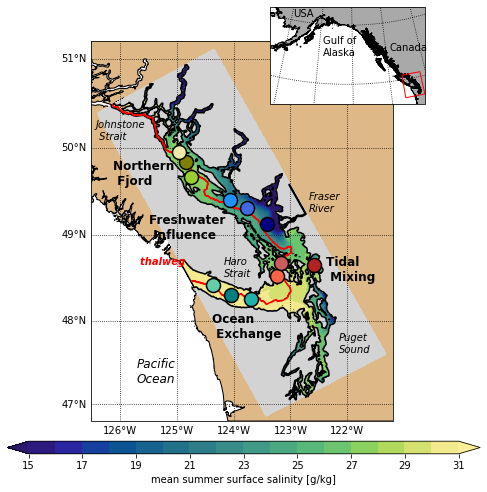

In [9]:
ms = 14
subdomain = [114, 397, 334, 897]
fig = plt.figure(figsize=(9, 7))
gs = plt.GridSpec(1, 1)#, width_ratios=[1.8, 1], wspace=0.13)

tlev = np.arange(0, 30, 3)

# Map Left
xlim, ylim = [-126.5, -121.2], [46.8, 51.2]
ax = fig.add_subplot(gs[0], projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
#full
#change to 'full'
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'))




c = ax.contourf(
    grid.nav_lon, grid.nav_lat, BR3_sal_summer[0,:,:], range(15, 32),
    cmap=cm.haline, extend='both', transform=crs.PlateCarree(), zorder=2,
)


lines = np.loadtxt('/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt', delimiter=" ", unpack=False)
lines = lines.astype(int)

thalweg_lon = grid.nav_lon.values[lines[:,0], lines[:,1]]
thalweg_lat = grid.nav_lat.values[lines[:,0], lines[:,1]]

ax.plot(thalweg_lon, thalweg_lat, 'r', transform=crs.PlateCarree(), markersize=1)

for i in range(0, len(xs_list)):
    tx = xs_list[i]; ty = ys_list[i]
    tlon = nav_lon[ty,tx]; tlat = nav_lat[ty,tx]

    w =ax.plot(tlon,tlat,marker = 'o', color = cols_list[i],\
               markeredgecolor = 'k', markeredgewidth = 1.5,\
               markersize=ms, transform=crs.Geodetic())

for attr, color in zip(['contourf', 'contour'], ['lightgray', 'k']):
    getattr(ax, attr)(
        grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
        levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,
    )
    
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

ax.text(0.15, 0.1, 'Pacific\nOcean', weight='normal', style = 'italic', fontsize = 12, transform=ax.transAxes)
ax.text(0.82, 0.18, 'Puget\nSound', weight='normal', style = 'italic', fontsize = 10, transform=ax.transAxes)
ax.text(0.015, 0.740, 'Johnstone \n Strait ', weight='normal', style = 'italic', fontsize = 10, transform=ax.transAxes, rotation=-0)

ax.text(0.44, 0.38, 'Haro\nStrait', weight='normal', style = 'italic', fontsize = 10, transform=ax.transAxes)
ax.text(0.72, 0.55, 'Fraser\nRiver', weight='normal',style = 'italic', fontsize = 10, transform=ax.transAxes)

#
ax.text(0.07, 0.620, 'Northern \n Fjord ', weight='bold', fontsize = 12, transform=ax.transAxes, rotation=-0)
ax.text(0.19, 0.480, 'Freshwater \n Influence ', weight='bold', fontsize = 12, transform=ax.transAxes, rotation=-0)
ax.text(0.78, 0.37, 'Tidal \n Mixing ', weight='bold', fontsize = 12, transform=ax.transAxes, rotation=-0)
ax.text(0.40, 0.22, 'Ocean \n Exchange', weight='bold', fontsize = 12, transform=ax.transAxes, rotation=-0)

ax.text(0.16, 0.410, 'thalweg ', weight='bold', style = 'italic', color = 'r',\
        fontsize = 10, transform=ax.transAxes, rotation=-0)


#Map Inset
xmap, ymap = [-161, -122], [45, 62]
ax = fig.add_axes([0.555, 0.75, 0.24, 0.2], projection=crs.LambertConformal(np.mean(xmap), np.mean(ymap)))
ax.set_extent(xmap + ymap)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='darkgray'))
ax.add_patch(Rectangle(
    (xlim[0], ylim[0]), int(np.diff(xlim)), int(np.diff(ylim)),
    transform=crs.PlateCarree(), fill=False, edgecolor='r', zorder=10,
))


ax.text(0.34, 0.5, 'Gulf of\nAlaska', transform=ax.transAxes)
ax.text(0.77, 0.55, 'Canada', transform=ax.transAxes)
ax.text(0.15, 0.9, 'USA', transform=ax.transAxes)



xticks, yticks = list(range(-170, -100, 10)), list(range(40, 80, 10))
ax.gridlines(linestyle=":", color='k', xlocs=xticks, ylocs=yticks)
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
fig.canvas.draw()
#lct.lambert_xticks(ax, xticks)
#lct.lambert_yticks(ax, yticks)

# Colorbar
cax = fig.add_axes([0.15, 0.06, 0.73, 0.025])
fig.colorbar(c, cax=cax, orientation='horizontal', label='mean summer surface salinity [g/kg]')

fig.savefig('./CG_FIGS/FIG_CG_01_domain.jpg', bbox_inches='tight', dpi = 300)



In [7]:
##box code that I can't quite figure out

# for box, color in zip([(0, -1, 0, -1), subdomain], ['k', 'w']):
#     lons, lats = [], []
#     corners = (box[2], box[0]), (box[2], box[1]), (box[3], box[1]), (box[3], box[0]), (box[2], box[0])
#     for i in corners: lons.append(grid.nav_lon[i]), lats.append(grid.nav_lat[i])
#     ax.plot(lons, lats, '-', transform=crs.PlateCarree(), zorder=6, color=color)
    


In [8]:

#needs moving 

#ax.text(0.02, 0.97, '(a)', transform=ax.transAxes)
